In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import env
import wrangle_zillow as w
import scipy.stats as stats

In [2]:
zillow_df = w.wrangle_zillow()

In [3]:
zillow_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71308 entries, 0 to 77574
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            71308 non-null  int64  
 1   parcelid                      71308 non-null  int64  
 2   bathroomcnt                   71308 non-null  float64
 3   bedroomcnt                    71308 non-null  float64
 4   calculatedbathnbr             71308 non-null  float64
 5   calculatedfinishedsquarefeet  71308 non-null  float64
 6   fips                          71308 non-null  float64
 7   fullbathcnt                   71308 non-null  float64
 8   latitude                      71308 non-null  float64
 9   longitude                     71308 non-null  float64
 10  propertylandusetypeid         71308 non-null  float64
 11  yearbuilt                     71308 non-null  float64
 12  structuretaxvaluedollarcnt    71308 non-null  float64
 13  t

<AxesSubplot:xlabel='calculatedfinishedsquarefeet'>

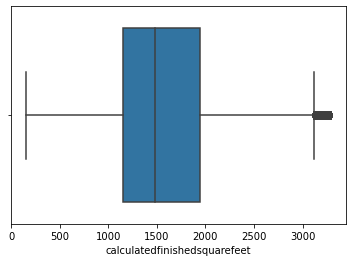

In [4]:
sns.boxplot(zillow_df.calculatedfinishedsquarefeet)

<AxesSubplot:xlabel='bathroomcnt'>

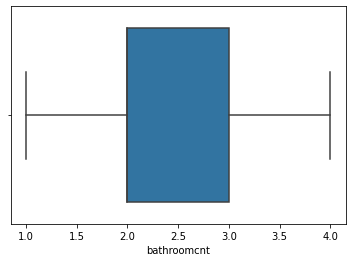

In [5]:
sns.boxplot(zillow_df.bathroomcnt)

<AxesSubplot:xlabel='bedroomcnt'>

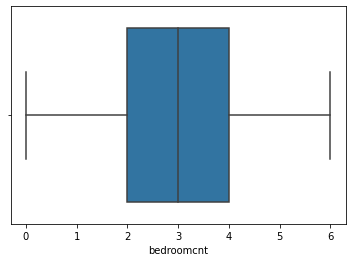

In [6]:
sns.boxplot(zillow_df.bedroomcnt)

In [7]:
znum_df = zillow_df[['bathroomcnt','bedroomcnt','calculatedbathnbr','calculatedfinishedsquarefeet','fullbathcnt','latitude','longitude','yearbuilt','structuretaxvaluedollarcnt','taxvaluedollarcnt','landtaxvaluedollarcnt','taxamount','logerror']]

In [8]:
zcat_df = zillow_df[['fips','propertylandusetypeid','propertylandusedesc']]

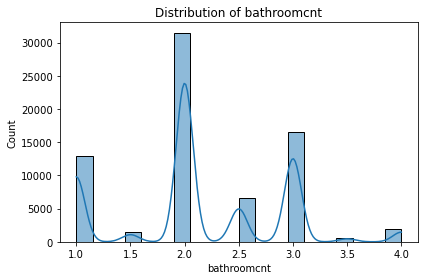

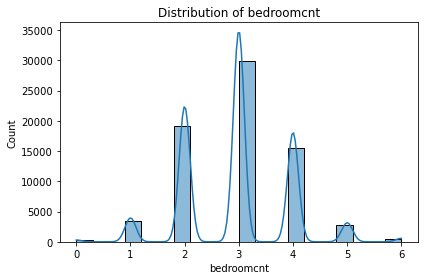

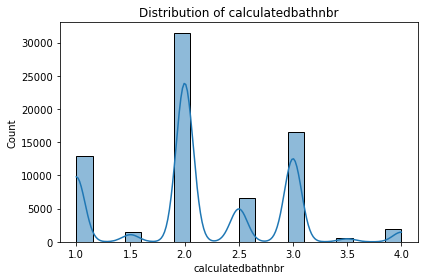

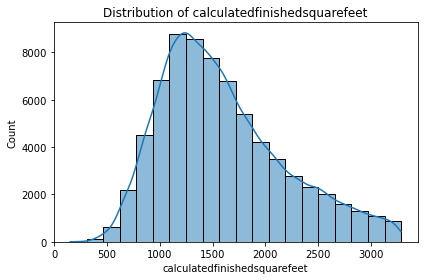

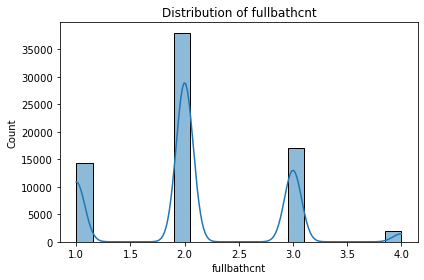

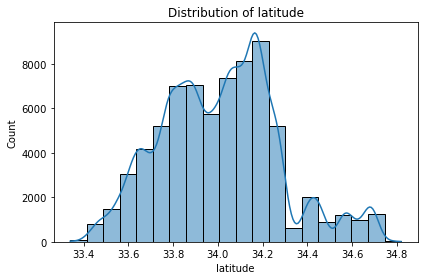

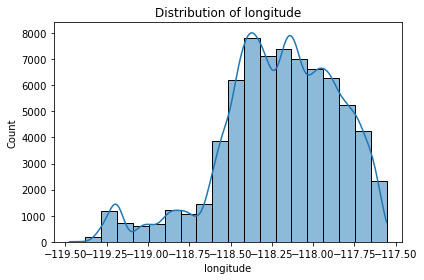

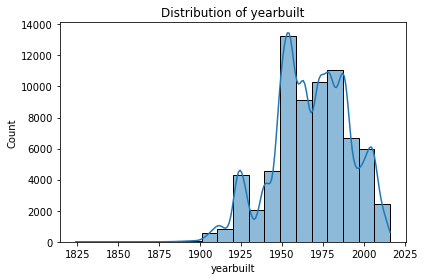

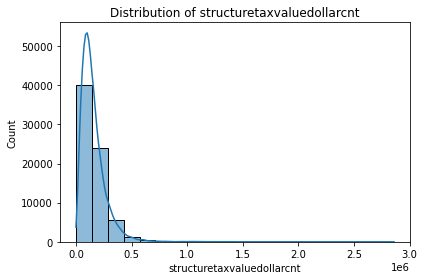

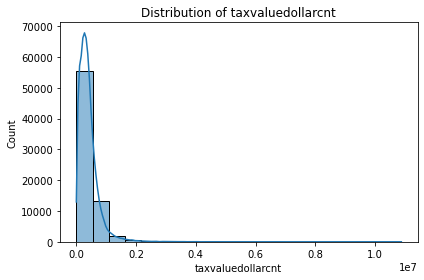

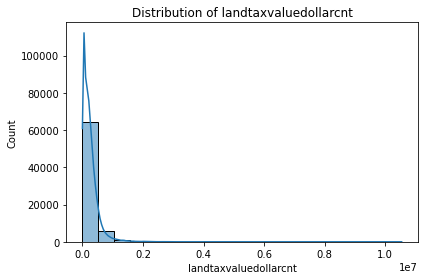

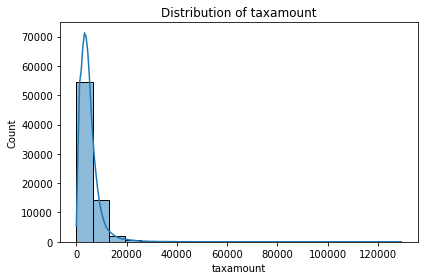

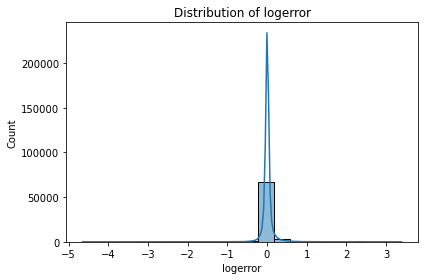

In [9]:
for x in znum_df:
    sns.histplot(zillow_df[x], bins = 20, kde = True)
    plt.title(f'Distribution of {x}')
    plt.tight_layout()
    plt.show()

In [12]:
train,validate,test = w.train_validate_test_split(zillow_df)

In [13]:
train.head()

,id,parcelid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,fips,fullbathcnt,latitude,longitude,propertylandusetypeid,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,propertylandusedesc
42674,47673,11170997,2.0,2.0,2.0,925.0,6037.0,2.0,34.410700,-118.561000,266.0,1989.0,147483.0,196290.0,48807.0,3376.31,0.069313,2017-06-02,Condominium
56989,2190731,14737473,2.5,3.0,2.5,1364.0,6059.0,2.0,33.685068,-117.624876,266.0,1988.0,149375.0,312683.0,163308.0,3114.72,-0.084098,2017-07-14,Condominium
69148,1588601,12465694,2.0,2.0,2.0,1171.0,6037.0,2.0,33.820600,-118.188000,266.0,1971.0,121830.0,223355.0,101525.0,2776.91,0.057743,2017-08-22,Condominium
20137,2040647,14370450,2.5,3.0,2.5,1484.0,6059.0,2.0,33.654941,-117.672599,261.0,1986.0,149325.0,479727.0,330402.0,4982.10,0.007958,2017-03-24,Single Family Residential
23546,1854146,11658637,1.0,2.0,1.0,1348.0,6037.0,1.0,34.063955,-118.475373,261.0,1952.0,218079.0,1035885.0,817806.0,12538.54,0.072622,2017-04-05,Single Family Residential


In [17]:
train['county'] = train['fips'].replace(to_replace = [6037, 6059, 6111], value = ['LA','Orange','Ventura'])

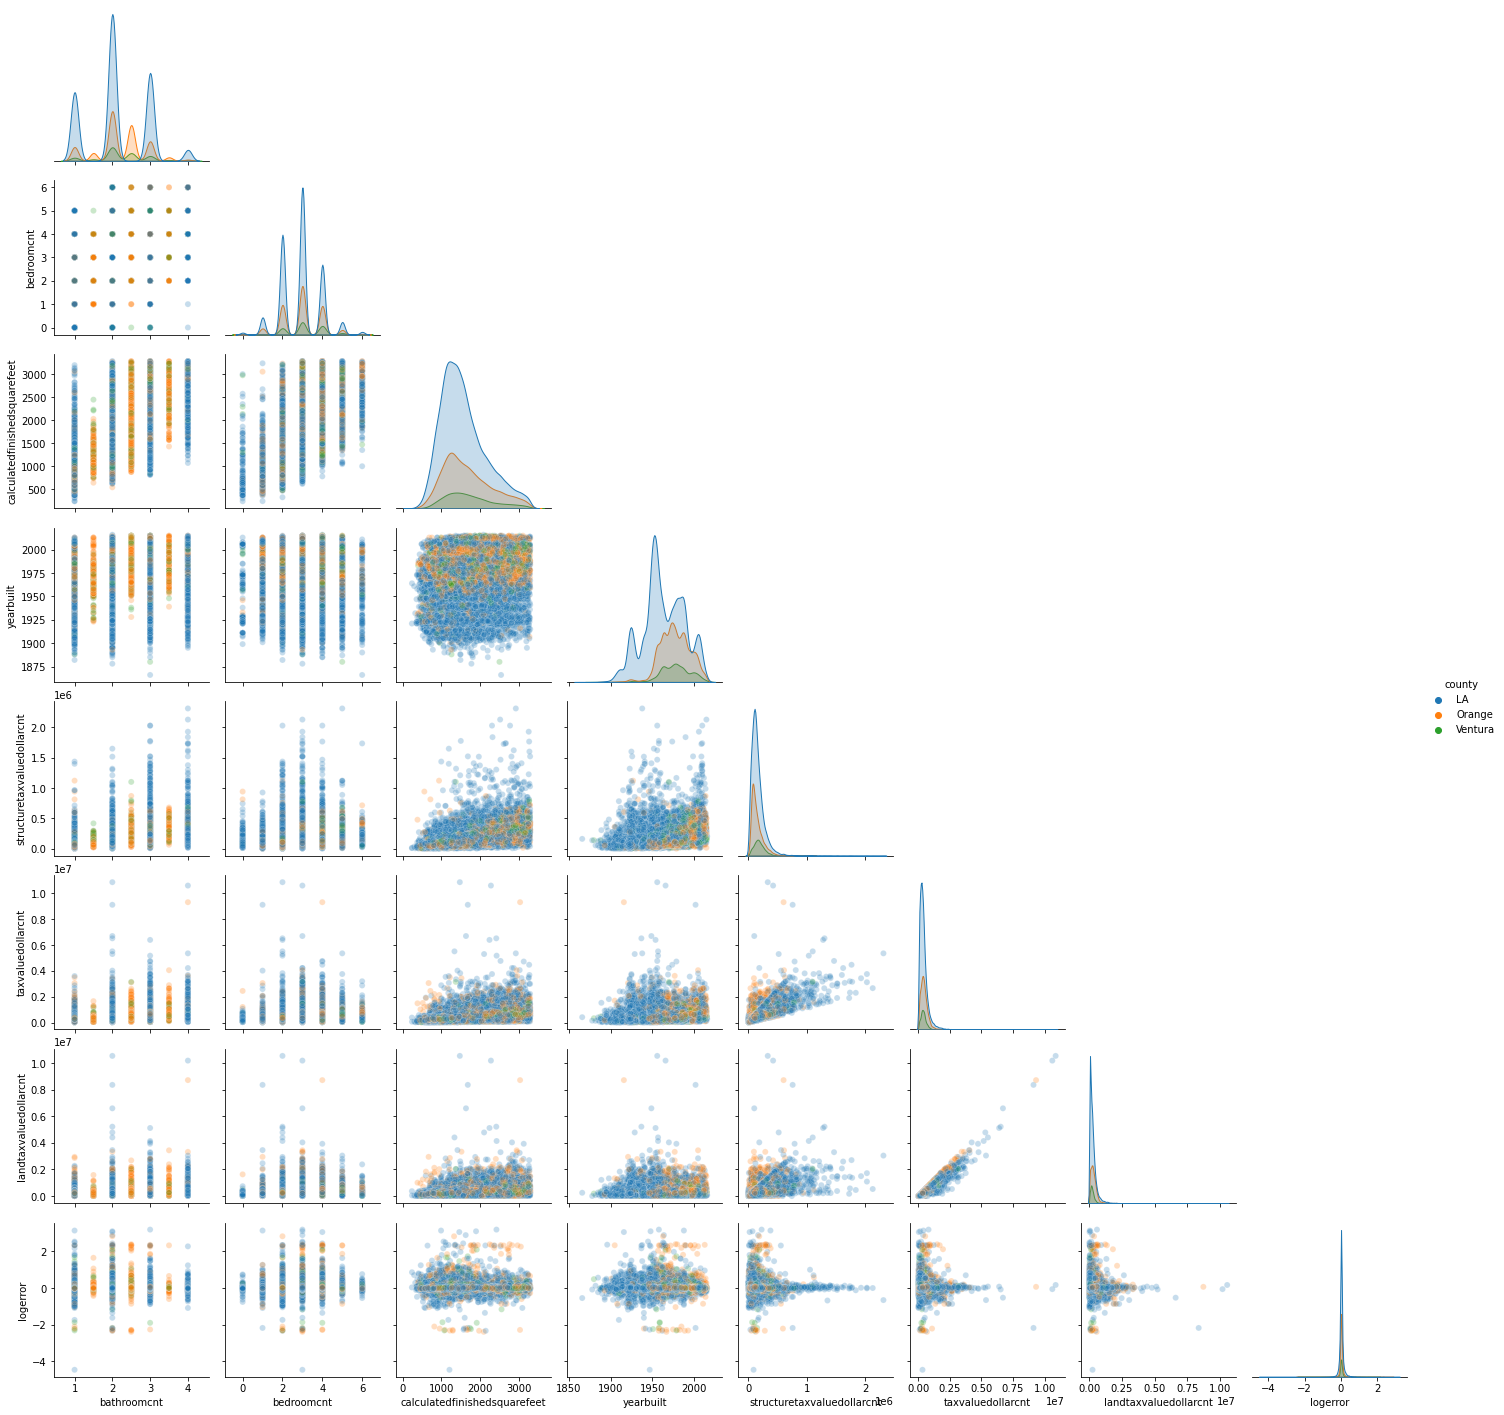

In [20]:
sns.pairplot(train[['bathroomcnt','bedroomcnt','calculatedfinishedsquarefeet',\
                    'yearbuilt','structuretaxvaluedollarcnt','taxvaluedollarcnt',\
                    'landtaxvaluedollarcnt','county','logerror']], hue = 'county', corner = True, plot_kws = {'alpha' :.25})